<a href="https://colab.research.google.com/github/faradishaldina/MachineLearning_2023/blob/main/UTS_Faradisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Segmentation Using Clustering

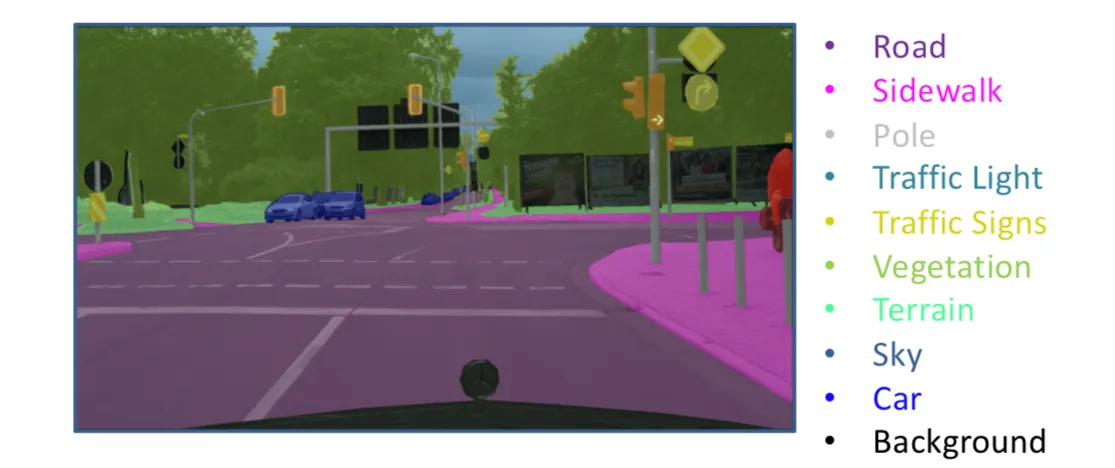

Segmentation is one of the methods used to distinguish one object from another in an image. This can be done by grouping the pixel values in the image based on their color proximity.

In this midterm exam, you are asked to perform segmentation of vehicle license plates in Indonesia. The purpose of segmentation in this case is to facilitate the reading of the license plate before further processes, such as character recognition on the license plate.

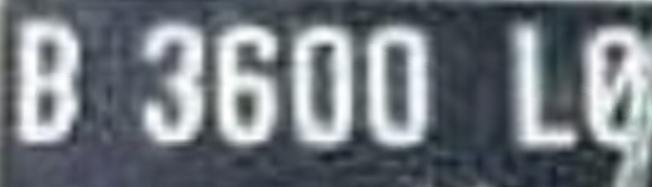

Based on the given case presentation, you are required to:

1. Select 5 license plate images for each group member from the provided dataset. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Perform segmentation on the license plate images to enhance the characters on the license plates.
3. You can use the K-Means algorithm as explained in previous practical sessions or any other clustering algorithm.
4. You are allowed to perform data preprocessing on the images, such as:
    - Changing the color space
    - Dimension reduction
    - Etc.
5. Display a comparison of the images before and after segmentation.

**Open Challenge** (Optional)
- How can you evaluate the results of the segmentation?
- Apply it to this case!

**Note:**
1. The image loading process is exemplified using the OpenCV library.
2. By default, OpenCV will load images in the BGR format.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

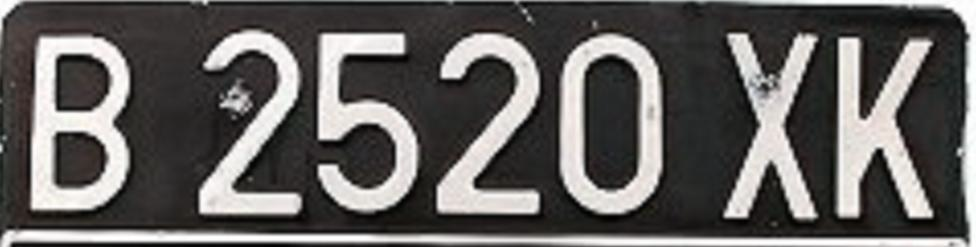

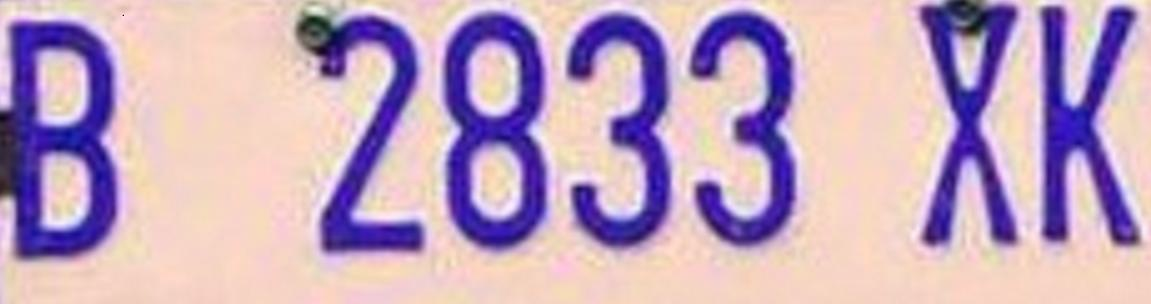

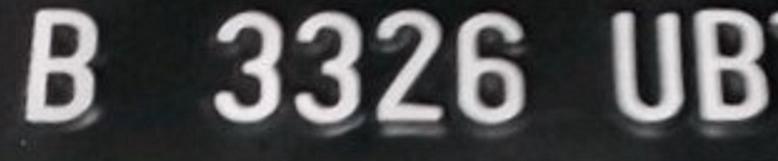

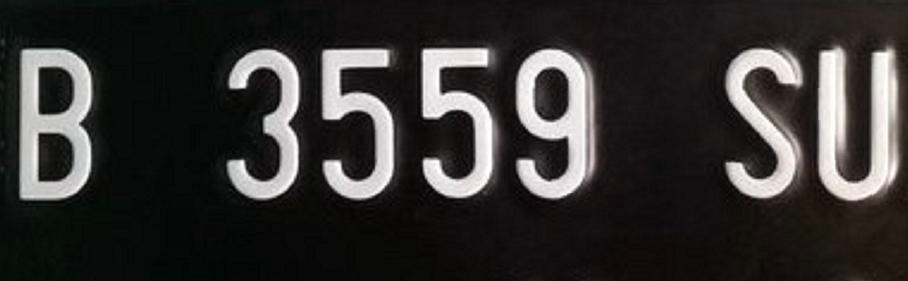

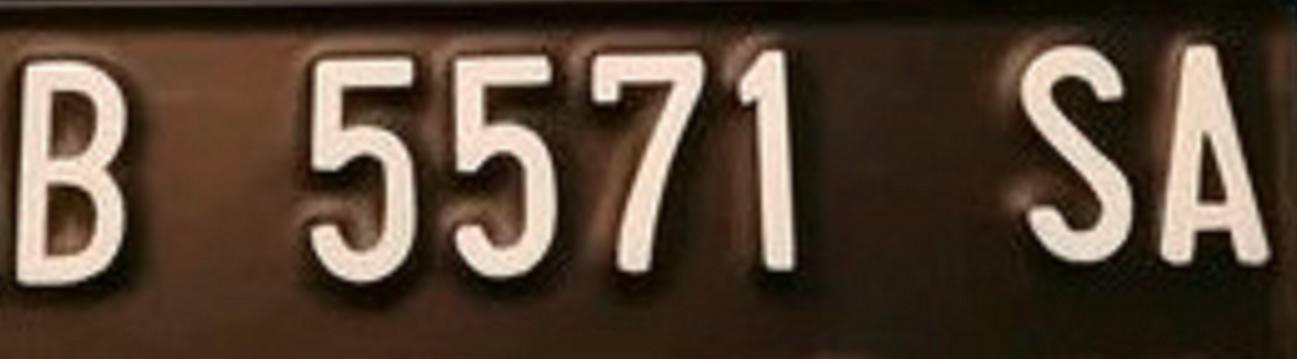

In [3]:
# Load Gambar
image1 = cv.imread('/content/drive/MyDrive/plat/1.jpg')
img1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)

image2 = cv.imread('/content/drive/MyDrive/plat/2.jpg')
img2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)

image3 = cv.imread('/content/drive/MyDrive/plat/3.jpg')
img3 = cv.cvtColor(image3, cv.COLOR_BGR2RGB)

image4 = cv.imread('/content/drive/MyDrive/plat/4.jpg')
img4 = cv.cvtColor(image4, cv.COLOR_BGR2RGB)

image5 = cv.imread('/content/drive/MyDrive/plat/5.jpg')
img5 = cv.cvtColor(image5, cv.COLOR_BGR2RGB)

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img1) # khusus google colab karena ada issue
cv2_imshow(img2)
cv2_imshow(img3)
cv2_imshow(img4)
cv2_imshow(img5)

In [4]:
h, w, ch= img1.shape
print(h)
print(w)
print(ch)

247
976
3


In [5]:
data = img1 / 255.0
data = data.reshape(247 * 976, 3)
data.shape


(241072, 3)

In [6]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)


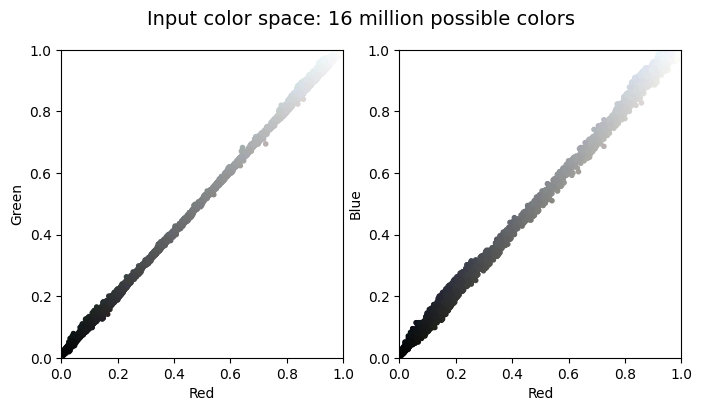

In [7]:

plot_pixels(data, title='Input color space: 16 million possible colors')

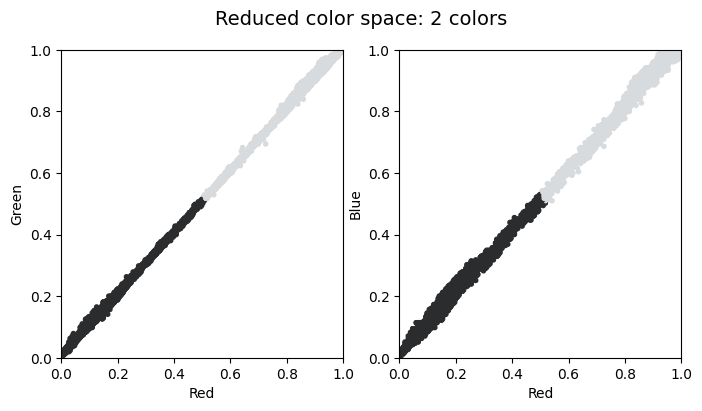

In [8]:

import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(2)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 2 colors")

Text(0.5, 1.0, '2-color Image')

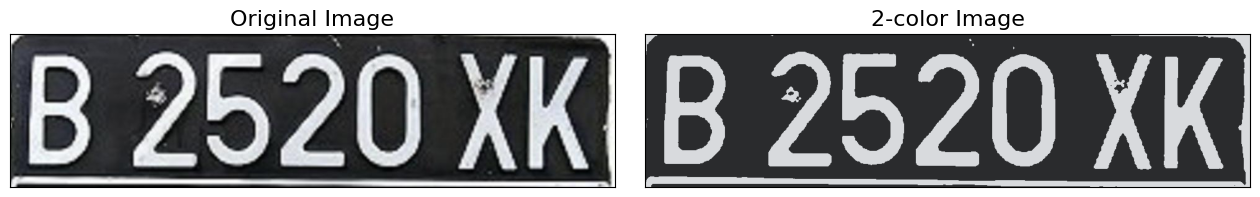

In [9]:
img_recolored = new_colors.reshape(img1.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img1)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('2-color Image', size=16)

#Segmentasi

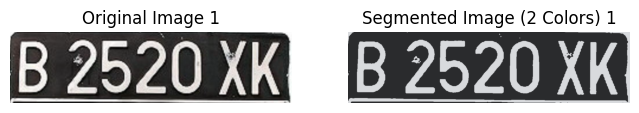

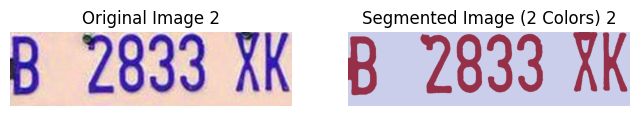

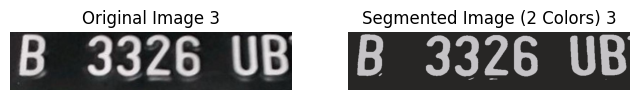

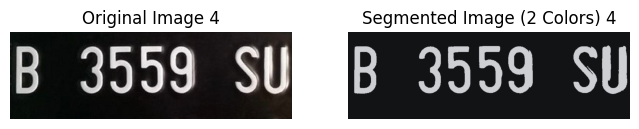

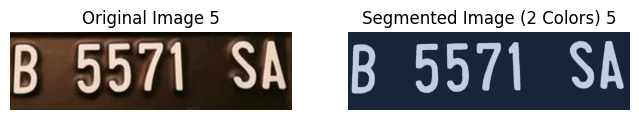

In [10]:

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2

# Load gambar-gambar ke dalam list
images = [img1, img2, img3, img4, img5]

# Fungsi untuk mengaplikasikan K-Means dengan 2 kluster warna
def apply_kmeans_2_colors(image):
    # Ubah gambar menjadi larik piksel
    pixels = np.array(image).reshape(-1, 3)

    # Terapkan K-Means dengan 2 kluster
    kmeans = KMeans(n_clusters=2, random_state=0)
    kmeans.fit(pixels)

    # Mengganti warna piksel dengan warna pusat terdekat
    segmented_image = kmeans.cluster_centers_[kmeans.predict(pixels)]

    # Ubah bentuk larik kembali menjadi gambar
    segmented_image = segmented_image.reshape(image.shape)

    return segmented_image

# Lakukan K-Means dengan 2 kluster untuk setiap gambar dalam list
segmented_images = [apply_kmeans_2_colors(image) for image in images]

# Tampilkan gambar-gambar hasil K-Means dengan 2 kluster warna
for i, segmented_image in enumerate(segmented_images):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title(f"Original Image {i + 1}")
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f"Segmented Image (2 Colors) {i + 1}")
    plt.imshow(segmented_image.astype(np.uint8))
    plt.axis('off')

plt.show()

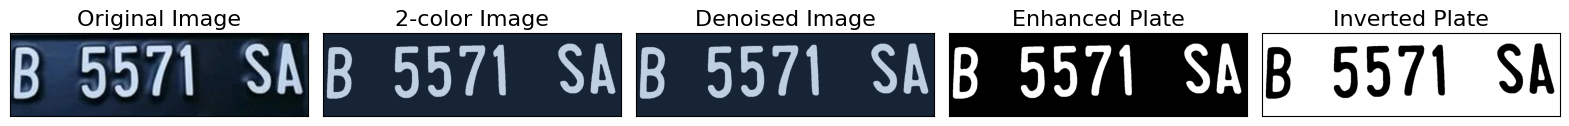

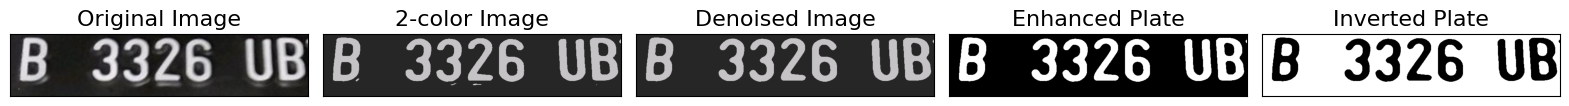

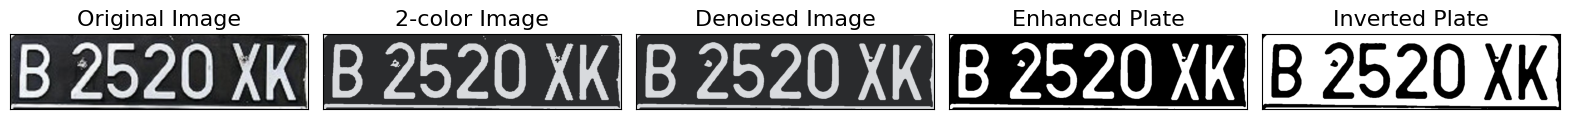

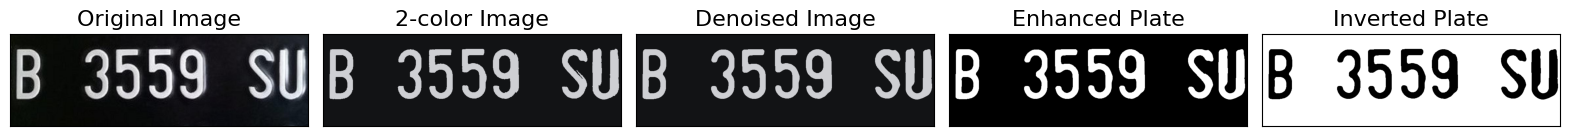

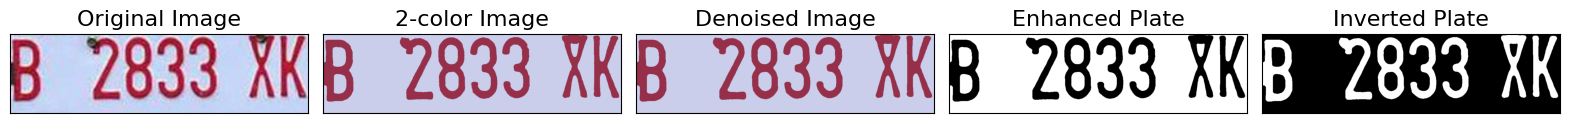

In [12]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

# Fungsi untuk mengubah warna terdiri dari 2 warna
def change_color(image):
    h, w, ch = image.shape
    data = image.astype(np.float32) / 255.0
    data = data.reshape(h * w, ch)

    kmeans = MiniBatchKMeans(2)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    recolored = (new_colors.reshape(h, w, ch) * 255).astype(np.uint8)

    return recolored

# Fungsi untuk meningkatkan kejelasan plat nomor
def enhance_plate(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    return thresh

# Fungsi untuk menghilangkan noise
def remove_noise(image):
    return cv2.medianBlur(image, 9)

# Fungsi untuk melakukan inversi warna
def invert_colors(image):
    return cv2.bitwise_not(image)

# Path ke folder yang berisi gambar
folder_path = '/content/drive/MyDrive/plat'

# Mendapatkan daftar file dalam folder
file = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Mengubah warna, menghilangkan noise, dan meningkatkan kejelasan nomor plat
for i, file_name in enumerate(file):
    image_path = os.path.join(folder_path, file_name)
    img = cv2.imread(image_path)

    recolored = change_color(img)
    denoised_image = remove_noise(recolored)
    enhanced_plate = enhance_plate(denoised_image)
    inverted_plate = invert_colors(enhanced_plate)

    # Menampilkan gambar asli, gambar dengan warna diubah, hasil setelah menghilangkan noise, hasil enhanced, dan hasil inverted pada gambar
    fig, ax = plt.subplots(1, 5, figsize=(20, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(cv2.cvtColor(recolored, cv2.COLOR_BGR2RGB))
    ax[1].set_title('2-color Image', size=16)
    ax[2].imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
    ax[2].set_title('Denoised Image', size=16)
    ax[3].imshow(enhanced_plate, cmap='gray')
    ax[3].set_title('Enhanced Plate', size=16)
    ax[4].imshow(inverted_plate, cmap='gray')
    ax[4].set_title('Inverted Plate', size=16)
    plt.show()